In [1]:
import Prelude 
import Control.Monad.Bayes.Class
import Control.Monad.Bayes.Enumerator
import Control.Monad.Bayes.Weighted
import Control.Monad.Bayes.Sampler.Strict
import Control.Monad
import Numeric.Log

:l ../Plotting.hs

# Distributions over **anything**

In Monad-Bayes, you can have distributions over absolutely any kind of value, of any type. Below, you can see a distribution over histograms, and a distribution over plots.

In [2]:
unnormalizedDistribution :: Measure Double
unnormalizedDistribution = do
    x <- bernoulli 0.5
    y <- normal (if x then (-2) else 2) 1
    factor (normalPdf 0 4 y)
    return y
    
distributionOverWeightedSamples :: Distribution (Double, Log Double)
distributionOverWeightedSamples = weighted unnormalizedDistribution
    
iidDistribution :: Distribution [(Double, Log Double)]
iidDistribution = replicateM 100000 distributionOverWeightedSamples
    
histogramDistribution :: Distribution Histogram
histogramDistribution = histogram 500 <$> iidDistribution
    
plotDistribution :: Distribution Plot
plotDistribution = plot . histogramToList <$> histogramDistribution

`unnormalizedDistribution` is an (unnormalized) distribution that we want to plot. 

`distributionOverWeightedSamples` is a distribution over pairs of samples from `unnormalizedDistribution` and their density. 

`iidDistribution` is a distribution over 100000 iid draws from `distributionOverWeightedSamples`.

`histogramDistribution` is a distribution over histograms, each corresponding to a possible list of iid samples.

`plotDistribution` is a distribution over plots (i.e. 2D visualizations that can be rendered in a notebook), each corresponding to a possible histogram. 

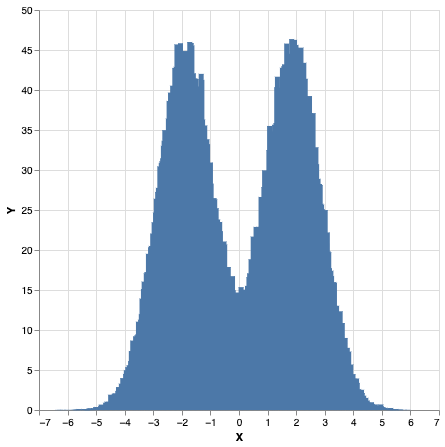

In [3]:
sampler plotDistribution